In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import copy
k = 1/(4 * np.pi * const.epsilon_0)

In [2]:
coords = np.mgrid[-25:26, -25:26]
ygrid = coords[0,:,:]
xgrid = coords[1,:,:]

In [3]:
class Charge:
    def __init__ (self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        r = np.hypot((xgrid - self.x),(ygrid - self.y))
        return (k* self.q / r)
    def electricfield(self,xgrid,ygrid):
        x = xgrid - self.x
        y = ygrid - self.y
        if(x == 0):
            theta = np.pi/2
        else:
            theta = np.arctan(y/x)        
            
        r = np.hypot((xgrid -self.x),(ygrid-self.y))
        mag = k* self.q / r**2
        
        if (x != 0):
            xField = cos * mag * x / abs(x)
        else:
            xField = 0
        if (y!= 0):
            yField = sin * mag * y / abs(y)
        else:
            yField = 0
            
        return (xField, yField)
    def singleField(self,x_point,y_point):
        x = x_point - self.x
        y = y_point - self.y

        r = np.hypot(x,y)
        mag = k * self.q / (r**2)

        if(x == 0):
            theta = np.pi/2
        else:
            theta = np.arctan(y/x)
        
        cos = abs(np.cos(theta))
        sin = abs(np.sin(theta))

        if (x != 0):
            xField = cos * mag * x / abs(x)
        else:
            xField = 0
        if (y!= 0):
            yField = sin * mag * y / abs(y)
        else:
            yField = 0

        return (xField, yField)

In [4]:
def pointField(x,y, ChargeList):
    xField = 0
    yField = 0
    for charge in ChargeList:
        # print(charge)
        xf, yf = charge.singleField(x,y)
        xField = xField + xf
        yField = yField + yf
    return (xField, yField)

In [63]:
def drawLine(x, y, v_x, v_y, h):
    Line = np.array([[x,y]])
    step = h
    x = v_x + x
    y = v_y + y
    while(x > -25 and x < 25 and y > -25 and y < 25):
        if(np.around(x, decimals=0) == 10 and np.around(y,decimals = 0) == 0):
            break
        if(np.around(x, decimals=0) == -10 and np.around(y,decimals = 0) == 0):
            break
        Line = np.append(Line, [[x,y]], axis = 0)
        largex = (pointField(x,y,chargelist)[0] * step / k)
        largey = (pointField(x,y,chargelist)[1] * step / k)
        magnitude = np.sqrt(largex**2 + largey**2)
        x = x + largex / magnitude * step
        y = y + largey / magnitude * step
    return Line

In [64]:
np.seterr(divide = 'ignore') 
chargelist = [Charge(-10, 0, -10), Charge(10,0,10) ]
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [65]:
#HW1

In [66]:
#Euler's Method from previous assignment w/ step size .5

In [67]:
Line = drawLine(-10, 0 , 1, 0, .5)
Line1 = drawLine(10,0,-1,0, .5)
Line2 = drawLine(10,0,0,-1, .5)
Line3 = drawLine(10,0,0,1, .5)
Line4 = drawLine(10,0,1,1, .5)
Line5 = drawLine(10,0,1,-1, .5)
Line6 = drawLine(-24.9,-24.9,1,1, .5)
Line7 = drawLine(-24.9,24.9,1,-1, .5)
Line8 = drawLine(10,0,-1,-1, .5)
Line9 = drawLine(10,0,-1,1, .5)


In [68]:
x_val = [x+25 for x in [coord[0] for coord in Line]]
y_val = [x+25 for x in [coord[1] for coord in Line]]

x1_val = [x+25 for x in [coord[0] for coord in Line1]]
y1_val = [x+25 for x in [coord[1] for coord in Line1]] 

x2_val = [x+25 for x in [coord[0] for coord in Line2]]
y2_val = [x+25 for x in [coord[1] for coord in Line2]] 

x3_val = [x+25 for x in [coord[0] for coord in Line3]]
y3_val = [x+25 for x in [coord[1] for coord in Line3]]

x4_val = [x+25 for x in [coord[0] for coord in Line4]]
y4_val = [x+25 for x in [coord[1] for coord in Line4]]

x5_val = [x+25 for x in [coord[0] for coord in Line5]]
y5_val = [x+25 for x in [coord[1] for coord in Line5]]

x6_val = [x+25 for x in [coord[0] for coord in Line6]]
y6_val = [x+25 for x in [coord[1] for coord in Line6]]

x7_val = [x+25 for x in [coord[0] for coord in Line7]]
y7_val = [x+25 for x in [coord[1] for coord in Line7]]

x8_val = [x+25 for x in [coord[0] for coord in Line8]]
y8_val = [x+25 for x in [coord[1] for coord in Line8]]

x9_val = [x+25 for x in [coord[0] for coord in Line9]]
y9_val = [x+25 for x in [coord[1] for coord in Line9]]

In [69]:
#RK2 Method

In [79]:
def RK2(x, y, v_x, v_y, h):
    Line = np.array([[x,y]])
    step = h
    x = v_x  + x
    y = v_y  + y
    while(x > -25 and x < 25 and y > -25 and y < 25):
        if(np.around(x, decimals=0) == 10 and np.around(y,decimals = 0) == 0):
            break
        if(np.around(x, decimals=0) == -10 and np.around(y,decimals = 0) == 0):
            break
        Line = np.append(Line, [[x,y]], axis = 0)
        slope_x = (pointField(x,y,chargelist)[0] * step / k)
        slope_y = (pointField(x,y,chargelist)[1] * step / k)
        magnitude = np.sqrt(slope_x**2 + slope_y**2)
        RKpoint_x = x + (slope_x / magnitude * step / 2)
        RKpoint_y = y + (slope_y / magnitude * step / 2)
        RKslope_x = (pointField(RKpoint_x,RKpoint_y,chargelist)[0] * step / k)
        RKslope_y = (pointField(RKpoint_x,RKpoint_y,chargelist)[1] * step / k)
        RKmagnitude = np.sqrt(RKslope_x**2 + RKslope_y**2)
        x = x + RKslope_x / RKmagnitude * step
        y = y + RKslope_y / RKmagnitude * step
    return Line

In [80]:
RKLine = RK2(-10, 0 , 1, 0, .5)
RKLine1 = RK2(10,0,-1,0, .5)
RKLine2 = RK2(10,0,0,-1, .5)
RKLine3 = RK2(10,0,0,1, .5)
RKLine4 = RK2(10,0,1,1, .5)
RKLine5 = RK2(10,0,1,-1, .5)
RKLine6 = RK2(-24.9,-24.9,1,1, .5)
RKLine7 = RK2(-24.9,24.9,1,-1, .5)
RKLine8 = RK2(10,0,-1,-1, .5)
RKLine9 = RK2(10,0,-1,1, .5)

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx6_val = [x+25 for x in [coord[0] for coord in RKLine6]]
RKy6_val = [x+25 for x in [coord[1] for coord in RKLine6]]

RKx7_val = [x+25 for x in [coord[0] for coord in RKLine7]]
RKy7_val = [x+25 for x in [coord[1] for coord in RKLine7]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

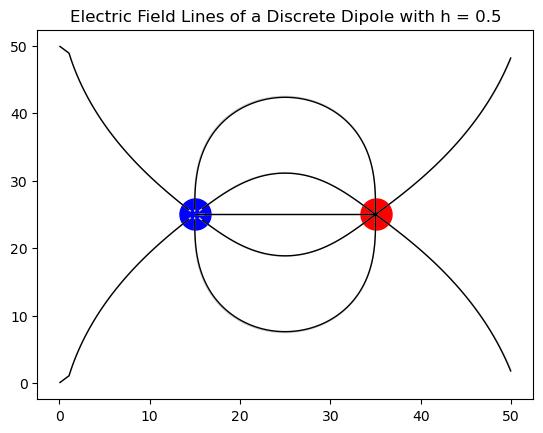

In [81]:
fig, ax = plt.subplots()

#Eulers Method
plt.plot(x_val, y_val,color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x1_val, y1_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x2_val, y2_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x3_val, y3_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x4_val, y4_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x5_val, y5_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x6_val, y6_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x7_val, y7_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x8_val, y8_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x9_val, y9_val, color='0.8', linestyle='-',lw=1, markersize = 1)

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

plt.scatter([15], [25], c = 'b', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of a Discrete Dipole with h = 0.5")
plt.show()

In [82]:
#1b

In [83]:
#Euler's Method

Line = drawLine(-10, 0 , 1, 0, .1)
Line1 = drawLine(10,0,-1,0, .1)
Line2 = drawLine(10,0,0,-1, .1)
Line3 = drawLine(10,0,0,1, .1)
Line4 = drawLine(10,0,1,1, .1)
Line5 = drawLine(10,0,1,-1, .1)
Line6 = drawLine(-24.9,-24.9,1,1, .1)
Line7 = drawLine(-24.9,24.9,1,-1, .1)
Line8 = drawLine(10,0,-1,-1, .1)
Line9 = drawLine(10,0,-1,1, .1)

x_val = [x+25 for x in [coord[0] for coord in Line]]
y_val = [x+25 for x in [coord[1] for coord in Line]]

x1_val = [x+25 for x in [coord[0] for coord in Line1]]
y1_val = [x+25 for x in [coord[1] for coord in Line1]] 

x2_val = [x+25 for x in [coord[0] for coord in Line2]]
y2_val = [x+25 for x in [coord[1] for coord in Line2]] 

x3_val = [x+25 for x in [coord[0] for coord in Line3]]
y3_val = [x+25 for x in [coord[1] for coord in Line3]]

x4_val = [x+25 for x in [coord[0] for coord in Line4]]
y4_val = [x+25 for x in [coord[1] for coord in Line4]]

x5_val = [x+25 for x in [coord[0] for coord in Line5]]
y5_val = [x+25 for x in [coord[1] for coord in Line5]]

x6_val = [x+25 for x in [coord[0] for coord in Line6]]
y6_val = [x+25 for x in [coord[1] for coord in Line6]]

x7_val = [x+25 for x in [coord[0] for coord in Line7]]
y7_val = [x+25 for x in [coord[1] for coord in Line7]]

x8_val = [x+25 for x in [coord[0] for coord in Line8]]
y8_val = [x+25 for x in [coord[1] for coord in Line8]]

x9_val = [x+25 for x in [coord[0] for coord in Line9]]
y9_val = [x+25 for x in [coord[1] for coord in Line9]]

In [84]:
#RK Method
RKLine = RK2(-10, 0 , 1, 0, .1)
RKLine1 = RK2(10,0,-1,0, .1)
RKLine2 = RK2(10,0,0,-1, .1)
RKLine3 = RK2(10,0,0,1, .1)
RKLine4 = RK2(10,0,1,1, .1)
RKLine5 = RK2(10,0,1,-1, .1)
RKLine6 = RK2(-24.9,-24.9,1,1, .1)
RKLine7 = RK2(-24.9,24.9,1,-1, .1)
RKLine8 = RK2(10,0,-1,-1, .1)
RKLine9 = RK2(10,0,-1,1, .1)

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx6_val = [x+25 for x in [coord[0] for coord in RKLine6]]
RKy6_val = [x+25 for x in [coord[1] for coord in RKLine6]]

RKx7_val = [x+25 for x in [coord[0] for coord in RKLine7]]
RKy7_val = [x+25 for x in [coord[1] for coord in RKLine7]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

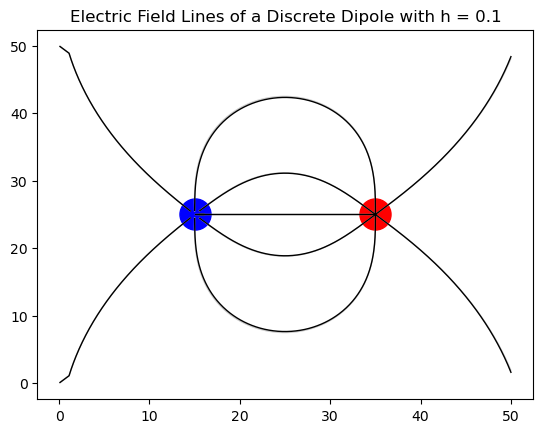

In [85]:
fig, ax = plt.subplots()

#Eulers Method
plt.plot(x_val, y_val,color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x1_val, y1_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x2_val, y2_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x3_val, y3_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x4_val, y4_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x5_val, y5_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x6_val, y6_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x7_val, y7_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x8_val, y8_val, color='0.8', linestyle='-',lw=1, markersize = 1)
plt.plot(x9_val, y9_val, color='0.8', linestyle='-',lw=1, markersize = 1)

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

plt.scatter([15], [25], c = 'b', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of a Discrete Dipole with h = 0.1")
plt.show()

In [78]:
#1c

The first plot shows us the difference in accuracy when using RK methods vs Euler methods. The RK method results in a more symmetrical curve, which is what we expect out of electric field lines. Although as we shrink the step size in plot 2, there is less of an obvious difference in the precision of the curves, we can see by the methods themselves that RK uses less computational power than a Euler's algorithm with half the step size.

In [86]:
#HW 2

In [88]:
#Not totally sure what the question is asking
#My code already handled field lines to infinity simply by increasing the number of gridpoints 
#and the bounds of the RK2 function accordingly
#Any starting point, no matter how far away, can be handled with my RK2 function as long as the grid and bounds can accomodate

In [145]:
def RK2(x, y, v_x, v_y, h, *args):
    flag = False
    Line = np.array([[x,y]])
    step = h
    x = v_x  + x
    y = v_y  + y
    while(x > -25 and x < 25 and y > -25 and y < 25):
        for ar in args:
            if(np.around(x, decimals=0) == ar[0] and np.around(y,decimals = 0) == ar[1]):
                flag = True
                break
        if(flag == True):
            break
        Line = np.append(Line, [[x,y]], axis = 0)
        slope_x = (pointField(x,y,chargelist)[0] * step / k)
        slope_y = (pointField(x,y,chargelist)[1] * step / k)
        magnitude = np.sqrt(slope_x**2 + slope_y**2)
        RKpoint_x = x + (slope_x / magnitude * step / 2)
        RKpoint_y = y + (slope_y / magnitude * step / 2)
        RKslope_x = (pointField(RKpoint_x,RKpoint_y,chargelist)[0] * step / k)
        RKslope_y = (pointField(RKpoint_x,RKpoint_y,chargelist)[1] * step / k)
        RKmagnitude = np.sqrt(RKslope_x**2 + RKslope_y**2)
        x = x + RKslope_x / RKmagnitude * step
        y = y + RKslope_y / RKmagnitude * step
    return Line

In [146]:
#2a

In [147]:
np.seterr(divide = 'ignore') 
chargelist = [Charge(0,0,10) ]
Potential = chargelist[0].potential(xgrid,ygrid)

In [148]:
#RK Method
RKLine = RK2(0, 0 , 1, 0, .1, (0,0))
RKLine1 = RK2(0,0,-1,0, .1, (0,0))
RKLine2 = RK2(0,0,0,-1, .1, (0,0))
RKLine3 = RK2(0,0,0,1, .1, (0,0))
RKLine4 = RK2(0,0,1,1, .1, (0,0))
RKLine5 = RK2(0,0,1,-1, .1, (0,0))
RKLine8 = RK2(0,0,-1,-1, .1, (0,0))
RKLine9 = RK2(0,0,-1,1, .1, (0,0))

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

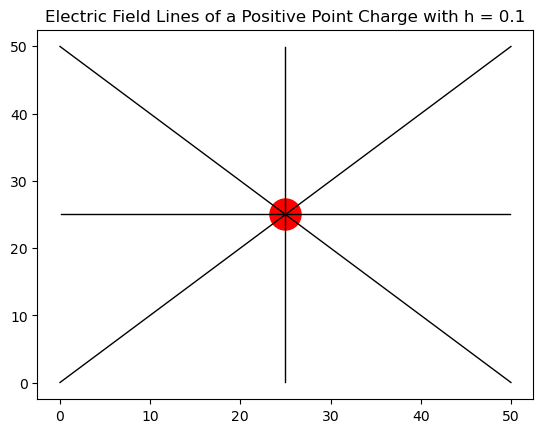

In [149]:
fig, ax = plt.subplots()

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)


plt.scatter([25], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of a Positive Point Charge with h = 0.1")
plt.show()

A point charge should have simple radial field lines

In [150]:
#2b

In [151]:
np.seterr(divide = 'ignore') 
chargelist = [Charge(-10, 0, 10), Charge(10,0,10) ]
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [152]:
#RK Method
RKLine = RK2(-10, 0 , 0, 1, .1, (-10,0),(10,0))
RKLine1 = RK2(10,0,0,1, .1, (-10,0),(10,0))
RKLine2 = RK2(10,0,0,-1, .1, (-10,0),(10,0))
RKLine3 = RK2(-10,0,0,-1, .1, (-10,0),(10,0))
RKLine4 = RK2(10,0,1,1, .1, (-10,0),(10,0))
RKLine5 = RK2(10,0,1,-1, .1, (-10,0),(10,0))
RKLine6 = RK2(0,0,0,1,.1, (-10,0), (10,0))
RKLine7 = RK2(0,0,0,-1,.1, (-10,0), (10,0))
RKLine8 = RK2(-10,0,-1,-1, .1, (-10,0),(10,0))
RKLine9 = RK2(-10,0,-1,1, .1, (-10,0),(10,0))

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx6_val = [x+25 for x in [coord[0] for coord in RKLine6]]
RKy6_val = [x+25 for x in [coord[1] for coord in RKLine6]]

RKx7_val = [x+25 for x in [coord[0] for coord in RKLine7]]
RKy7_val = [x+25 for x in [coord[1] for coord in RKLine7]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

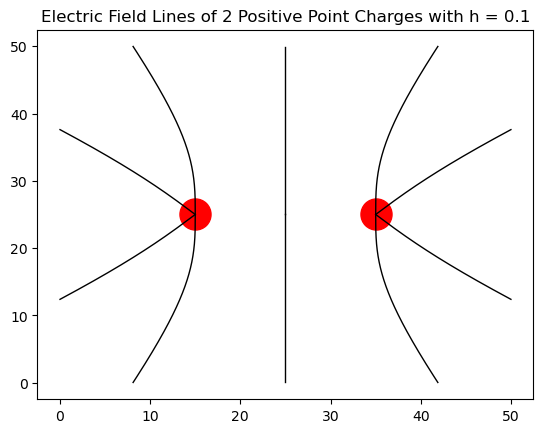

In [153]:
fig, ax = plt.subplots()

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

plt.scatter([15], [25], c = 'r', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of 2 Positive Point Charges with h = 0.1")
plt.show()

This also looks like the field lines for two positive point charges

In [154]:
#2C

In [155]:
np.seterr(divide = 'ignore') 
chargelist = [Charge(-10, 0, 10), Charge(10,0,10), Charge(0,0,-10)]
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [156]:
#RK Method
RKLine = RK2(-10, 0 , 0, 1, .1, (-10,0),(10,0))
RKLine1 = RK2(10,0,0,1, .1, (-10,0),(10,0))
RKLine2 = RK2(10,0,0,-1, .1, (-10,0),(10,0))
RKLine3 = RK2(-10,0,0,-1, .1, (-10,0),(10,0))
RKLine4 = RK2(10,0,1,1, .1, (-10,0),(10,0))
RKLine5 = RK2(10,0,1,-1, .1, (-10,0),(10,0))
RKLine6 = RK2(10,0,1,0,.1, (-10,0), (10,0))
RKLine7 = RK2(-10,0,-1,0,.1, (-10,0), (10,0))
RKLine8 = RK2(-10,0,-1,-1, .1, (-10,0),(10,0))
RKLine9 = RK2(-10,0,-1,1, .1, (-10,0),(10,0))

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx6_val = [x+25 for x in [coord[0] for coord in RKLine6]]
RKy6_val = [x+25 for x in [coord[1] for coord in RKLine6]]

RKx7_val = [x+25 for x in [coord[0] for coord in RKLine7]]
RKy7_val = [x+25 for x in [coord[1] for coord in RKLine7]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

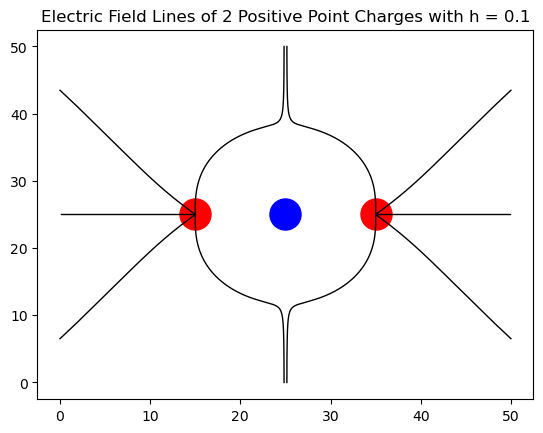

In [157]:
fig, ax = plt.subplots()

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

plt.scatter([15], [25], c = 'r', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.scatter([25], [25], c = 'b', s = 500)

plt.title("Electric Field Lines of 2 Positive Point Charges with h = 0.1")
plt.show()

Lines that start outside of the positive charges are dominated by the positive charges, while lines that start inside of the positive charges are attracted to x=0 by the center negative charge.

In [158]:
#3

In [159]:
np.seterr(divide = 'ignore') 
chargelist = [Charge(-10, 0, -10), Charge(10,0,10) ]
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [319]:
def equipotential(x, y):
    Line = np.array([[x,y]])
    potential = Potential[y][x]
    for a in range(0,50):
        for b in range(0,50):
            if (Potential[b][a]/k == np.around(potential/k,decimals=1)):
                Line = np.append(Line, [[a,b]], axis = 0)
    return Line

In [293]:
#RK Method
RKLine = RK2(-10, 0 , 1, 0, .1,(-10,0),(10,0))
RKLine1 = RK2(10,0,-1,0, .1,(-10,0),(10,0))
RKLine2 = RK2(10,0,0,-1, .1,(-10,0),(10,0))
RKLine3 = RK2(10,0,0,1, .1,(-10,0,(10,0)))
RKLine4 = RK2(10,0,1,1, .1,(-10,0),(10,0))
RKLine5 = RK2(10,0,1,-1, .1,(-10,0),(10,0))
RKLine6 = RK2(-24.9,-24.9,1,1, .1,(-10,0),(10,0))
RKLine7 = RK2(-24.9,24.9,1,-1, .1,(-10,0),(10,0))
RKLine8 = RK2(10,0,-1,-1, .1,(-10,0),(10,0))
RKLine9 = RK2(10,0,-1,1, .1,(-10,0),(10,0))

RKx_val = [x+25 for x in [coord[0] for coord in RKLine]]
RKy_val = [x+25 for x in [coord[1] for coord in RKLine]]

RKx1_val = [x+25 for x in [coord[0] for coord in RKLine1]]
RKy1_val = [x+25 for x in [coord[1] for coord in RKLine1]] 

RKx2_val = [x+25 for x in [coord[0] for coord in RKLine2]]
RKy2_val = [x+25 for x in [coord[1] for coord in RKLine2]] 

RKx3_val = [x+25 for x in [coord[0] for coord in RKLine3]]
RKy3_val = [x+25 for x in [coord[1] for coord in RKLine3]]

RKx4_val = [x+25 for x in [coord[0] for coord in RKLine4]]
RKy4_val = [x+25 for x in [coord[1] for coord in RKLine4]]

RKx5_val = [x+25 for x in [coord[0] for coord in RKLine5]]
RKy5_val = [x+25 for x in [coord[1] for coord in RKLine5]]

RKx6_val = [x+25 for x in [coord[0] for coord in RKLine6]]
RKy6_val = [x+25 for x in [coord[1] for coord in RKLine6]]

RKx7_val = [x+25 for x in [coord[0] for coord in RKLine7]]
RKy7_val = [x+25 for x in [coord[1] for coord in RKLine7]]

RKx8_val = [x+25 for x in [coord[0] for coord in RKLine8]]
RKy8_val = [x+25 for x in [coord[1] for coord in RKLine8]]

RKx9_val = [x+25 for x in [coord[0] for coord in RKLine9]]
RKy9_val = [x+25 for x in [coord[1] for coord in RKLine9]]

In [294]:
Line = equipotential(25,25)
x_val = [x for x in [coord[0] for coord in Line]]
y_val = [x for x in [coord[1] for coord in Line]]

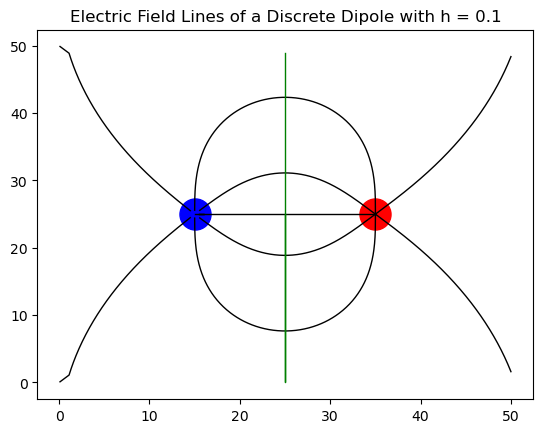

In [295]:
fig, ax = plt.subplots()

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

#equipotential
plt.plot(x_val, y_val, "g",lw=1, markersize = 1)


plt.scatter([15], [25], c = 'b', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of a Discrete Dipole with h = 0.1")
plt.show()

The equipotential is in fact perpendicular to the field lines

In [324]:
#HW 4

In [491]:
#updating function
def equipotential(x, y, v_x, v_y, h=.1):
    step = h
    xstart = x
    ystart = y
    Line = np.array([[x,y]])
    x = v_x  + x
    y = v_y  + y
    while(x > -25 and x < 25 and y > -25 and y < 25):
        if(np.around(x, decimals=0) == xstart and np.around(y,decimals = 0) == ystart):
            break
        Line = np.append(Line, [[x,y]], axis = 0)
        slope_x = (pointField(x,y,chargelist)[0] * step / k)
        slope_y = (pointField(x,y,chargelist)[1] * step / k)
        magnitude = np.sqrt(slope_x**2 + slope_y**2)
        RKpoint_x = x + (slope_y / magnitude * step / 2)
        RKpoint_y = y + (-slope_x / magnitude * step / 2)      
        RKslope_x = (pointField(RKpoint_x,RKpoint_y,chargelist)[0] * step / k)
        RKslope_y = (pointField(RKpoint_x,RKpoint_y,chargelist)[1] * step / k)
        RKmagnitude = np.sqrt(RKslope_x**2 + RKslope_y**2)
        x = x + RKslope_y / RKmagnitude * step
        y = y + -RKslope_x / RKmagnitude * step
        if(y>25):
            y = -24.9
    return Line


In [492]:
levels = [k*-1.5,k*-.5,0,k*.5,k*1.5]

In [493]:
xgrid = np.linspace(15,35,21)

In [494]:
def totalpotential(xgrid):
    potentialslice = np.array([])
    for point in xgrid:
        x = int(point)
        potential = Potential[25][x]
        potentialslice = np.append(potentialslice, potential)
    return potentialslice

In [495]:
potentialslice = totalpotential(xgrid)

In [496]:
xpoints = np.array([])
for level in levels:
    i = np.argmax(potentialslice>=level)
    xpoints = np.append(xpoints, xgrid[i])

In [497]:
print(xpoints)

[20. 23. 25. 28. 31.]


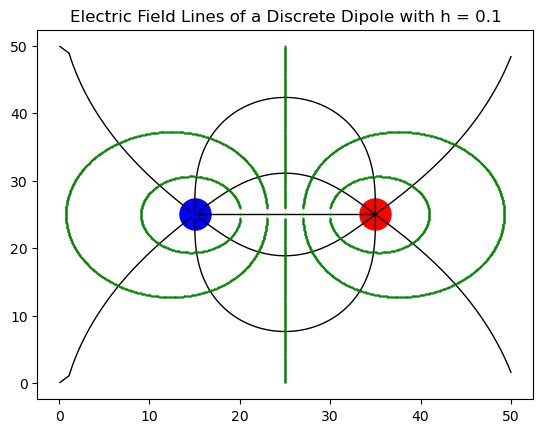

In [498]:
fig, ax = plt.subplots()

#RK Method
plt.plot(RKx_val, RKy_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx1_val, RKy1_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx2_val, RKy2_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx3_val, RKy3_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx4_val, RKy4_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx5_val, RKy5_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx6_val, RKy6_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx7_val, RKy7_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx8_val, RKy8_val, color='0', linestyle='-',lw=1, markersize = 1)
plt.plot(RKx9_val, RKy9_val, color='0', linestyle='-',lw=1, markersize = 1)

# equipotential
for point in xpoints:
    if point > 25:
        point = point - 26.
    else:
        point = point-25.
    Line = equipotential(point,0,0,1)
    x_val = [25 + x for x in [coord[0] for coord in Line]]
    y_val = [25 + x for x in [coord[1] for coord in Line]]
    plt.plot(x_val, y_val, "g.",lw=1, markersize = 1)

plt.scatter([15], [25], c = 'b', s = 500)
plt.scatter([35], [25], c = 'r', s = 500)
plt.title("Electric Field Lines of a Discrete Dipole with h = 0.1")
plt.show()